# Step 1: Understand the dataset

In [1]:
#Importing all the ncessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Reading data from file
Data_CLV = pd.read_csv("CustomerRecords.csv")
print(Data_CLV.head(3))

   TransactionID TransactionDate  CustomerID  Amount
0              1        9/4/2012           1   20.26
1              2       5/15/2012           2   10.87
2              3       5/23/2014           2    2.21


In [2]:
#1. Are there any missing values in the dataset?
print(Data_CLV.isnull().sum())

TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64


As the above records suggests, there are no missing values

In [3]:
#2. What is the range of dates in the dataset?

print("Range of dates in the dataset")
min_date = Data_CLV['TransactionDate'].min()
print("Minimum Date: " + str(min_date))
max_date = Data_CLV['TransactionDate'].max()
print("Maximun Date: " + str(max_date))

Range of dates in the dataset
Minimum Date: 1/1/2011
Maximun Date: 9/9/2015


In [4]:
#3. How many unique customers are there in the dataset?

CustomerCount = max_date = Data_CLV['CustomerID'].nunique()
print("Total unique customers in the dataset are " + str(CustomerCount))

Total unique customers in the dataset are 1000


In [5]:
#4. Profile the data to give the standard descriptive statistics for the Amount field. 
# What is the min, max, variance, and standard deviations?

print("Variance of Amount Field: " + str(np.round(Data_CLV['Amount'].var(),2)))
print('-----------------------------------------------------------------')
print("Min, Max, and Standard Deviations of Amount Field: ")
np.round(Data_CLV[['Amount']].describe(),2)

Variance of Amount Field: 1499.54
-----------------------------------------------------------------
Min, Max, and Standard Deviations of Amount Field: 


,Amount
count,4186.00
mean,9.03
std,38.72
min,-1.00
25%,3.31
50%,6.88
75%,11.69
max,2033.00


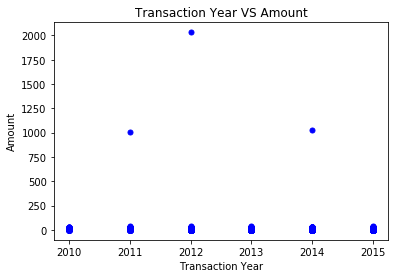

<Figure size 432x288 with 0 Axes>

In [6]:
#5. Do transaction amounts in general increase over time (perhaps due to inflation)?

Data_CLV['TransacionYear'] = pd.DatetimeIndex(Data_CLV['TransactionDate']).year

#Plotting a scatter plot of TransacionYear vs Amount to identify the trend
plt.scatter(Data_CLV['TransacionYear'], Data_CLV['Amount'], s=25, c='blue')
plt.xlabel('Transaction Year')
plt.ylabel('Amount')
plt.title("Transaction Year VS Amount")
plt.show()
plt.savefig('tempffile.png')

Except some of the outlier transactions, the amount has not incrased with time

# Step 2: Explore the dataset

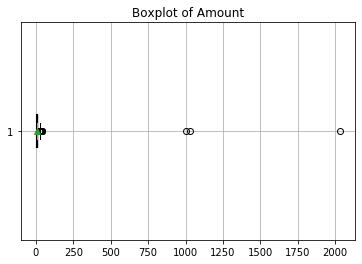

As the boxplot shows there are few outliers as well as few negative values which we can identify and delete


In [7]:
# 1. Are there any outliers? 
plt.boxplot(Data_CLV['Amount'],1 ,showmeans = True, vert = False)
plt.title("Boxplot of Amount")
plt.grid()
plt.show()

print("As the boxplot shows there are few outliers as well as few negative values which we can identify and delete")

In [8]:
#Identifying the outliers
print("We can identify the outliers as the those  above 3 SD and below zero i.e. negative amount values")
Data_CLV['Outlier'] = np.logical_or(Data_CLV['Amount']<0, (np.logical_or((Data_CLV['Amount'] <= (Data_CLV['Amount'].mean() - (Data_CLV['Amount'].std() * 3))),
                                    (Data_CLV['Amount'] >= (Data_CLV['Amount'].mean() + (Data_CLV['Amount'].std() * 3))))))

#Display of 5 outliers in the data
print("Outliers in the Data: ")
Data_CLV[Data_CLV["Outlier"]==True]

We can identify the outliers as the those  above 3 SD and below zero i.e. negative amount values
Outliers in the Data: 


,TransactionID,TransactionDate,CustomerID,Amount,TransacionYear,Outlier
23,24,10/7/2011,7,1003.0,2011,True
49,50,5/12/2012,13,-1.0,2012,True
211,212,5/14/2014,54,1027.0,2014,True
3326,3327,1/16/2014,811,-1.0,2014,True
4177,4178,8/13/2012,1000,2033.0,2012,True


The boxplot after dropping the outliers is as follows:


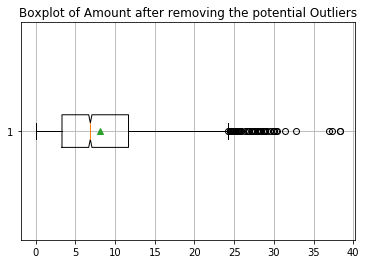

In [9]:
#2. If so how would you treat them?

#Dropping the outlier rows
Data_CLV.drop(Data_CLV[Data_CLV['Outlier'] == True].index, inplace=True)

#Dropping the column Outlier
del Data_CLV['Outlier']

#Box plot after removing the Outliers
plt.title("Boxplot of Amount after removing the potential Outliers")
plt.boxplot(Data_CLV['Amount'],1, showmeans = True, vert = False)

print("The boxplot after dropping the outliers is as follows:")
plt.grid()
plt.show()

# Step 3: Determine origin year of customers

In [10]:
Data_CLV.head(3)

,TransactionID,TransactionDate,CustomerID,Amount,TransacionYear
0,1,9/4/2012,1,20.26,2012
1,2,5/15/2012,2,10.87,2012
2,3,5/23/2014,2,2.21,2014


In [11]:
#Identifying the origin of the customer by grouping customer ID

Cust_OriginYear = Data_CLV.groupby('CustomerID')[['TransacionYear']].min()
Data_CLV = pd.merge(Data_CLV,Cust_OriginYear, on = 'CustomerID')
Data_CLV = Data_CLV.rename(columns={"TransacionYear_x":"TransacionYear", "TransacionYear_y":"Cust_Origin"})

#Converting Transaction Date to date time format
Data_CLV['TransactionDate'] = pd.to_datetime(Data_CLV['TransactionDate'])

print("Identifying the customer origin year for all transactions")
Data_CLV.head(3)

Identifying the customer origin year for all transactions


,TransactionID,TransactionDate,CustomerID,Amount,TransacionYear,Cust_Origin
0,1,2012-09-04,1,20.26,2012,2012
1,2,2012-05-15,2,10.87,2012,2012
2,3,2014-05-23,2,2.21,2014,2012


# Step 4: Calculate cumulative transaction amounts

In [12]:
#Calcualting cumultaive amount value for customers orignated in all five years  

DataCust_2010 = Data_CLV[Data_CLV['Cust_Origin'] == 2010]
DataCust_2011 = Data_CLV[Data_CLV['Cust_Origin'] == 2011]
DataCust_2012 = Data_CLV[Data_CLV['Cust_Origin'] == 2012]
DataCust_2013 = Data_CLV[Data_CLV['Cust_Origin'] == 2013]
DataCust_2014 = Data_CLV[Data_CLV['Cust_Origin'] == 2014]
DataCust_2015 = Data_CLV[Data_CLV['Cust_Origin'] == 2015]

x0 = (DataCust_2010.groupby('TransacionYear')[['Amount']].sum()).cumsum()
org_Cust10 = np.round(list(x0['Amount']),2)

x1 = (DataCust_2011.groupby('TransacionYear')[['Amount']].sum()).cumsum()
org_Cust11 = np.round(list(x1['Amount']),2)

x2 = (DataCust_2012.groupby('TransacionYear')[['Amount']].sum()).cumsum()
org_Cust12 = np.round(list(x2['Amount']),2)

x3 = (DataCust_2013.groupby('TransacionYear')[['Amount']].sum()).cumsum()
org_Cust13 = np.round(list(x3['Amount']),2)

x4 = (DataCust_2014.groupby('TransacionYear')[['Amount']].sum()).cumsum()
org_Cust14 = np.round(list(x4['Amount']),2)

x5 = (DataCust_2015.groupby('TransacionYear')[['Amount']].sum()).cumsum()
org_Cust15 = np.round(list(x5['Amount']),2)

#Creating the cumultaive amount table
temp_list1 = [org_Cust10, org_Cust11, org_Cust12, org_Cust13, org_Cust14, org_Cust15]
months1 = ['12','24','36','48','60','72']
Amount_Cmltv = pd.DataFrame(temp_list1, columns = months1)
Amount_Cmltv = Amount_Cmltv.fillna(0)
Origin = ['2010-01-01 - 2010-12-31','2011-01-01 - 2011-12-31','2012-01-01 - 2012-12-31','2013-01-01 - 2013-12-31','2014-01-01 - 2014-12-31','2015-01-01 - 2015-12-31']
Amount_Cmltv['Origin'] = Origin
Amount_Cmltv = Amount_Cmltv.set_index('Origin')

print("The cumulative amount table is as follows: ")
Amount_Cmltv

The cumulative amount table is as follows: 


,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
2011-01-01 - 2011-12-31,2238.46,3757.90,5465.99,6703.11,7862.24,0.00
2012-01-01 - 2012-12-31,2181.35,3874.69,5226.86,6501.85,0.00,0.00
2013-01-01 - 2013-12-31,2179.85,3609.81,5227.75,0.00,0.00,0.00
2014-01-01 - 2014-12-31,1830.85,3262.05,0.00,0.00,0.00,0.00
2015-01-01 - 2015-12-31,1912.17,0.00,0.00,0.00,0.00,0.00


# Step 5: Calculate new customers per year

In [13]:
#Calcualting total new customers orignated in all five years

y0 = DataCust_2010.groupby('TransacionYear')[['CustomerID']].nunique()
new_cust10 =  np.array([y0['CustomerID'].iloc[0] for i in range(DataCust_2010['TransacionYear'].nunique())])

y1 = DataCust_2011.groupby('TransacionYear')[['CustomerID']].nunique()
new_cust11 =  np.array([y1['CustomerID'].iloc[0] for i in range(DataCust_2011['TransacionYear'].nunique())])

y2 = DataCust_2012.groupby('TransacionYear')[['CustomerID']].nunique()
new_cust12 =  np.array([y2['CustomerID'].iloc[0] for i in range(DataCust_2012['TransacionYear'].nunique())])

y3 = DataCust_2013.groupby('TransacionYear')[['CustomerID']].nunique()
new_cust13 =  np.array([y3['CustomerID'].iloc[0] for i in range(DataCust_2013['TransacionYear'].nunique())])

y4 = DataCust_2014.groupby('TransacionYear')[['CustomerID']].nunique()
new_cust14 =  np.array([y4['CustomerID'].iloc[0] for i in range(DataCust_2014['TransacionYear'].nunique())])

y5 = DataCust_2015.groupby('TransacionYear')[['CustomerID']].nunique()
new_cust15 =  np.array([y5['CustomerID'].iloc[0] for i in range(DataCust_2015['TransacionYear'].nunique())])

#Creating the new customer table
temp2_list = [new_cust10, new_cust11, new_cust12, new_cust13, new_cust14, new_cust15]
months = ['12','24','36','48','60','72']
Origin = ['2010-01-01 - 2010-12-31','2011-01-01 - 2011-12-31','2012-01-01 - 2012-12-31','2013-01-01 - 2013-12-31','2014-01-01 - 2014-12-31','2015-01-01 - 2015-12-31']
new_customers = pd.DataFrame(temp2_list, columns = months)
new_customers = new_customers.fillna(0)
new_customers['Origin'] = Origin
new_customers = new_customers.set_index('Origin')
print("The total new acquired customers for each year is as follows:")
new_customers

The total new acquired customers for each year is as follows:


,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,172,172.0,172.0,172.0,172.0,172.0
2011-01-01 - 2011-12-31,170,170.0,170.0,170.0,170.0,0.0
2012-01-01 - 2012-12-31,163,163.0,163.0,163.0,0.0,0.0
2013-01-01 - 2013-12-31,180,180.0,180.0,0.0,0.0,0.0
2014-01-01 - 2014-12-31,155,155.0,0.0,0.0,0.0,0.0
2015-01-01 - 2015-12-31,160,0.0,0.0,0.0,0.0,0.0


# Step 6: Historic CLV - Finding Weighted CLV

In [14]:
#Calculating Historic_CLV

Historic_CLV = Amount_Cmltv / new_customers
Historic_CLV = np.round(Historic_CLV.fillna(0), 2)

print("Historic CLV amounts for each customer origin group is as follows:")

Historic_CLV

Historic CLV amounts for each customer origin group is as follows:


,12,24,36,48,60,72
Origin,,,,,,
2010-01-01 - 2010-12-31,13.14,21.02,30.67,38.56,46.11,52.12
2011-01-01 - 2011-12-31,13.17,22.11,32.15,39.43,46.25,0.00
2012-01-01 - 2012-12-31,13.38,23.77,32.07,39.89,0.00,0.00
2013-01-01 - 2013-12-31,12.11,20.05,29.04,0.00,0.00,0.00
2014-01-01 - 2014-12-31,11.81,21.05,0.00,0.00,0.00,0.00
2015-01-01 - 2015-12-31,11.95,0.00,0.00,0.00,0.00,0.00


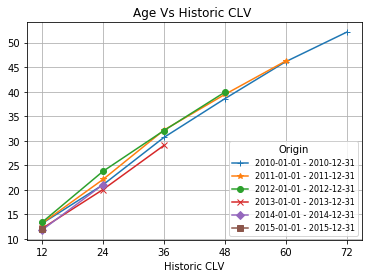

In [16]:
#Plotting the results for each year on the same graph

line1, = plt.plot(Historic_CLV.iloc[0], marker="+")
line2, = plt.plot(Historic_CLV.iloc[1 ,0:5], marker= "*")
line3, = plt.plot(Historic_CLV.iloc[2 ,0:4], marker= "o")
line4, = plt.plot(Historic_CLV.iloc[3 ,0:3], marker= "x")
line5, = plt.plot(Historic_CLV.iloc[4 ,0:2], marker= "D")
line6, = plt.plot(Historic_CLV.iloc[5 ,0:1], marker= "s")

plt.xlabel('Age')
plt.xlabel('Historic CLV')
plt.title("Age Vs Historic CLV ")

plt.legend([line1, line2, line3, line4, line5, line6],
           ['2010-01-01 - 2010-12-31','2011-01-01 - 2011-12-31','2012-01-01 - 2012-12-31',
            '2013-01-01 - 2013-12-31','2014-01-01 - 2014-12-31','2015-01-01 - 2015-12-31'],
           loc='lower right', prop={'size': 8}, title = "Origin")
plt.grid()
plt.show()

# Step 7: Interpreting your results

In [17]:
#Calculating a volume-weighted average of the Historic CLV for each group at each Age

t_new_customers = new_customers.transpose()
t_Historic_CLV = Historic_CLV.transpose()

final_ans = []

for i in range(Data_CLV['Cust_Origin'].nunique()):
    temp_array = np.array(t_Historic_CLV.iloc[i]) * np.array(t_new_customers.iloc[i])
    temp_sum = np.sum(temp_array)
    single_value = temp_sum / np.sum(np.array(t_new_customers.iloc[i]))
    final_ans.append(np.round(single_value,2))

df_grpCLV = pd.DataFrame (final_ans, columns = ["Historic CLV"])
Age = ['12','24','36','48','60','72']

df_grpCLV["Age"] = Age
df_grpCLV = df_grpCLV.set_index('Age')
df_grpCLV

,Historic CLV
Age,
12,12.60
24,21.57
36,30.94
48,39.28
60,46.18
72,52.12


How much have customers acquired in 2011 spent to date?

Ans: Total spend by Customers acquired in 2011 till date is $7862.24

Do each group of customers exhibit similar or different patterns of spending?
What’s the implication for the business?

Ans: According to data, each group of customers exhibit similarpatterns of spending. The business impact is the revenue from each customers will keep going up till customer is an active member of the business